# EE798Q 
# Project: Coal India Open Pit Blasting

## Name : Abhishek Prakash                                                                         
## Roll No : 210043

## Introduction : 
#### Open-pit mining holds a firm grip on India's coal production landscape, as it remains the dominant method employed. Anticipated future coal demand suggests a robust trajectory ahead. However, the nation faces formidable environmental challenges arising from diverse mining activities, notably the emission of particulate matter and various gaseous pollutants. These issues have a detrimental impact on air quality, prompting concerns and limitations on coal utilization.

## Problem : 
### Blasting from open-pit coal mines causing massive air pollution.
#### The two main air pollutants in NCL coal fields are suspended particulate matter (SPM) and reparable particulate matter (RPM). Air quality monitoring is regularly carried out at both dustgenerating and non-generating locations in the vicinity in order to evaluate the particulate pollution in and around the opencast mining projects of the Singrauli coalfield. SPM and RPM concentrations are predominate at coal working surfaces, coal yards, coal handling facilities, and haul roads used to transport coal, as well as close to drilling sites, in overburden, and on such haul roads. Air pollution measurements available via multi-sensory system are PM10, PM2.5, SO2, NO2, NOx, CO, NH3, O3 and BENZENE.

In [1]:
# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt

import seaborn as sns

# To check the accuracy of model :
from sklearn.metrics import mean_absolute_error, mean_squared_error

from math import sqrt

Load and Read the Data

In [2]:
# Read the data :
dataset = pd.read_csv("open pit blasting.csv")

In [3]:
# Print the data :
dataset

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
0,1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
1,2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2,3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
3,4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
4,5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8636,8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8637,8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1
8638,8639,01-05-2023 23:30,01-05-2023 23:45,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1


In [4]:
# Checking shape and data types of the data :
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   #                                                         8640 non-null   int64  
 1   From                                                      8640 non-null   object 
 2   To (Interval: 15M)                                        8640 non-null   object 
 3   Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)     6959 non-null   float64
 4   Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)    8414 non-null   float64
 5   Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)       7271 non-null   float64
 6   Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)      8224 non-null   float64
 7   Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)        8225 non-null   float64
 8   Singrauli, Surya K

## (Qn.3.c) Interpretation


### Summary table that provides the following statistical measures for each numerical column:
#### count: The number of non-missing values in the column.
#### mean: The average value of the column.
#### std: The standard deviation, which measures the dispersion or variability of the values in the column.
#### min: The minimum value in the column.
#### 25%: The first quartile (25th percentile), which represents the value below which 25% of the data falls.
#### 50%: The second quartile (50th percentile), also known as the median, which represents the value below which 50% of the data falls.
#### 75%: The third quartile (75th percentile), which represents the value below which 75% of the data falls.
#### max: The maximum value in the column.

In [5]:
dataset.describe()

,#,"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
count,8640.000000,6959.000000,8414.000000,7271.000000,8224.000000,8225.000000,8144.000000,7189.000000,8314.000000,8187.000000,2445.000000
mean,4320.500000,181.408679,75.690397,14.649636,55.757028,42.672219,1.408538,34.232731,13.242663,35.626530,0.177505
std,2494.297496,136.016142,55.245265,19.221385,20.231407,22.435262,0.631056,39.452131,6.151034,27.018693,0.098895
min,1.000000,12.000000,3.000000,0.100000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2160.750000,84.000000,36.000000,3.900000,39.400000,25.000000,0.950000,16.100000,9.400000,10.500000,0.100000
50%,4320.500000,145.000000,61.000000,6.100000,53.200000,37.700000,1.420000,25.300000,11.000000,32.400000,0.100000
75%,6480.250000,238.000000,101.000000,16.500000,71.025000,53.800000,1.850000,35.200000,14.000000,58.800000,0.200000
max,8640.000000,847.000000,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


### . From the above information, dataset have 2 Categorical variables and 11 Numerical variables.
### . The data have total 13 variables and 8640 records.

### number of rows and columns in the dataset


In [6]:
dataset.shape

(8640, 13)

### checking how many null values are in each column

In [7]:
dataset.isnull().sum()

#                                                              0
From                                                           0
To (Interval: 15M)                                             0
Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)       1681
Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)       226
Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)         1369
Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)         416
Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)           415
Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)          496
Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)        1451
Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)         326
Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)       453
Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)    6195
dtype: int64

In [8]:
columns = dataset.columns
date = columns[2]
columns = columns[3:]
columns

Index(['Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)'],
      dtype='object')

### (Qn.2) Creates histograms and kernel density plots to visualize the distribution of data in each column of a dataset.

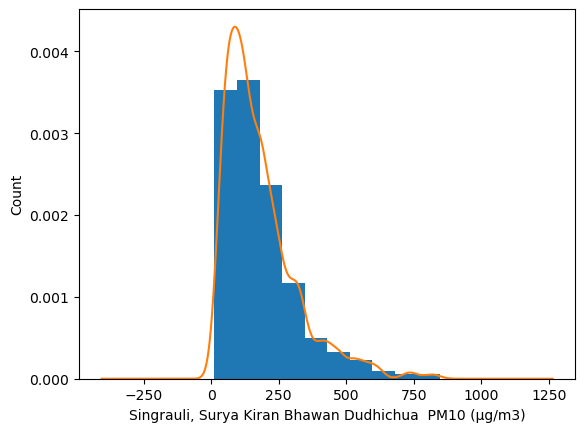

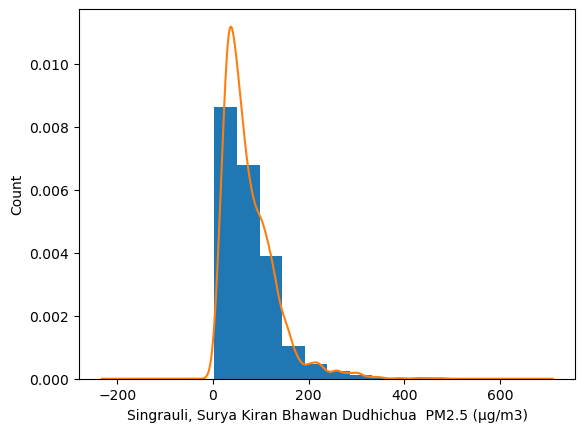

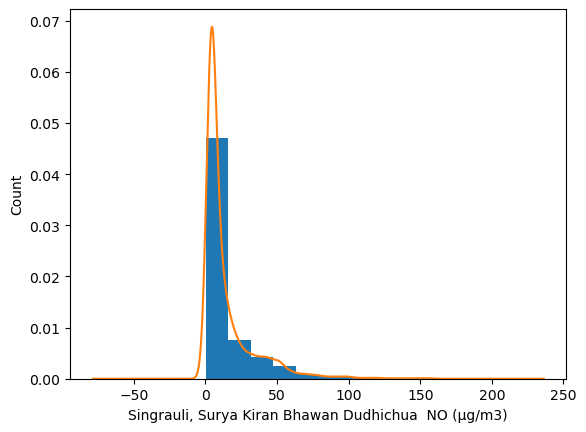

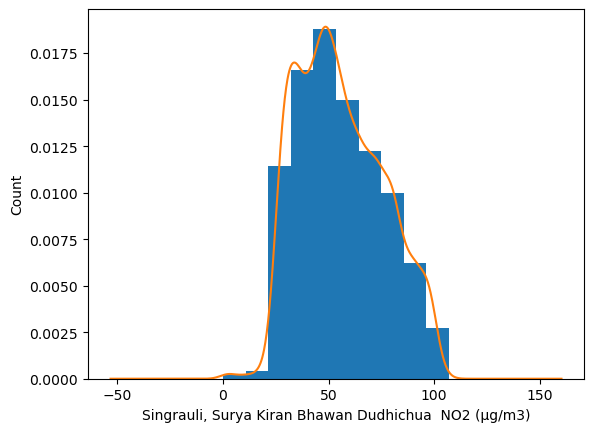

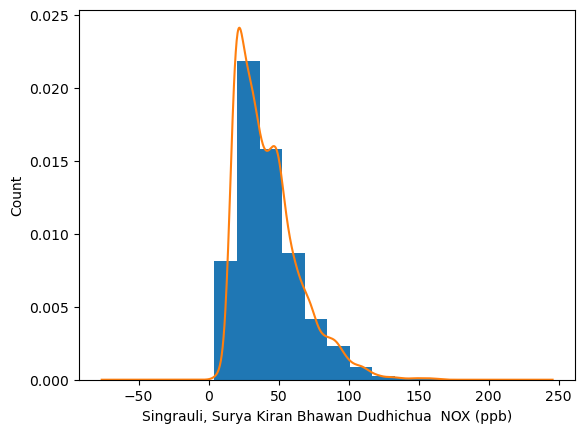

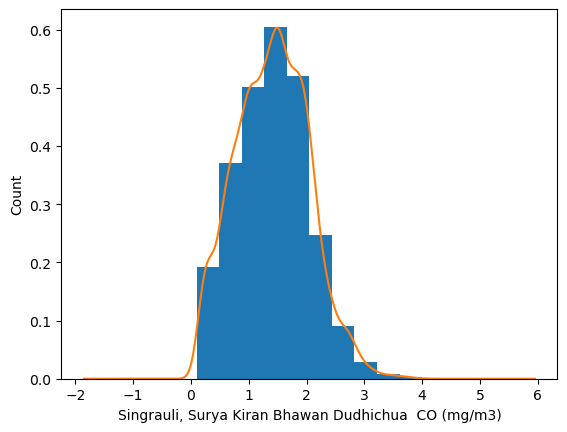

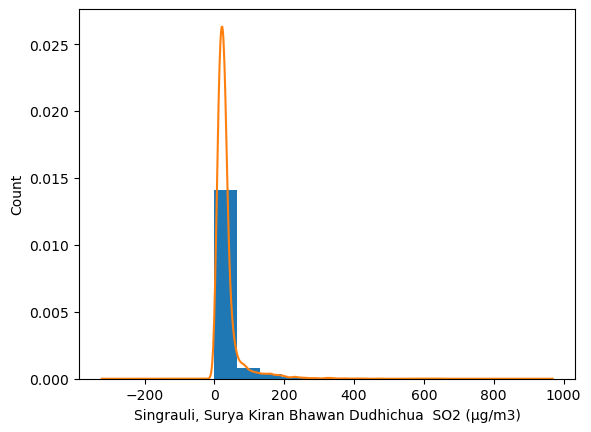

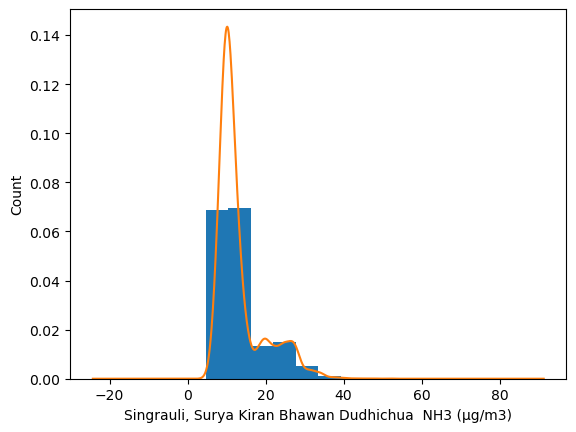

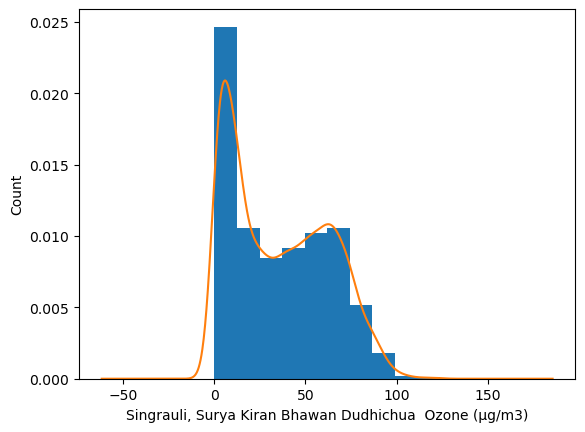

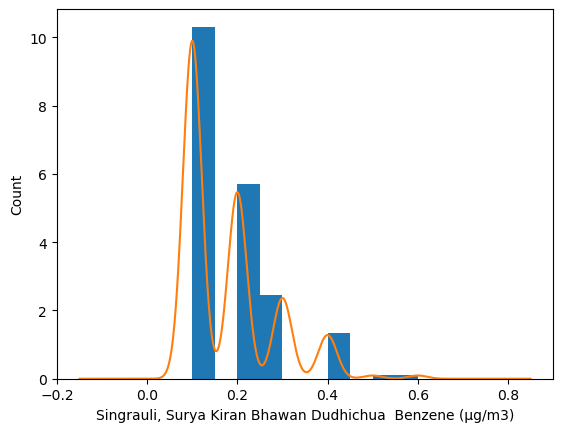

In [9]:
for column in columns:
    dataset[column].plot(kind='hist', density=True)
    dataset[column].plot(kind='kde')
    plt.xlabel(column)  # Set the x-axis label to the column name
    plt.ylabel('Count')
    plt.show()

## As observed from the above graphs->

### CO,NO2,NOX count distributions are approximately symmetric. 
### PM10, PM2.5, NO, SO2, NH3, Ozone, Benzene count distributions are right skewed.

### prints the percentage of missing values for each column in the dataSet DataFrame.

In [10]:
for column in columns:
    print((dataset[column].isna().sum() / len(dataset[column])) * 100)

19.45601851851852
2.6157407407407405
15.844907407407408
4.814814814814815
4.8032407407407405
5.7407407407407405
16.79398148148148
3.7731481481481484
5.243055555555555
71.70138888888889


### ( Qn.1) Since more than half of the distribution of columns have skewed distribution, using the mean to fill NA values is not good.
### Here we are filling NA values using cubic interpolatation. This ensures that the summary statistics, such as the mean and standard deviation, are less affected compared to filling with other values like zero or the mean. This helps to maintain the integrity of the statistical measures.

In [11]:
for column in columns:
    y = pd.Series(dataset[column])
    dataset[column] = y.interpolate(kind = "cubic", limit_direction = "both")
    


### (Qn.3.e) Data Visualization after preprocessing

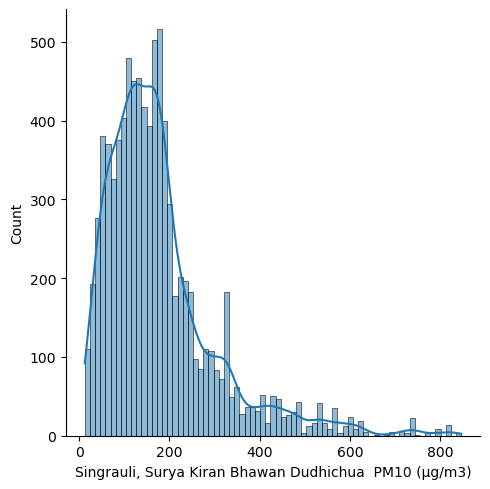

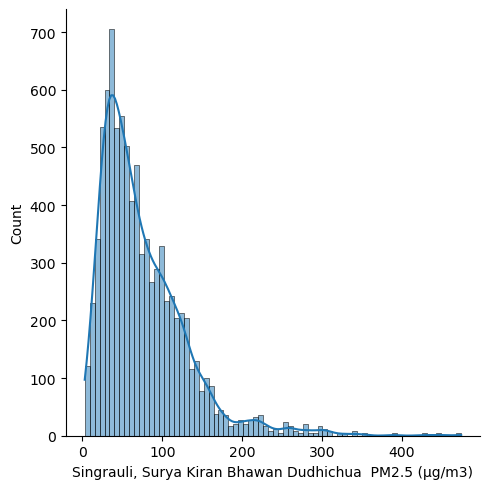

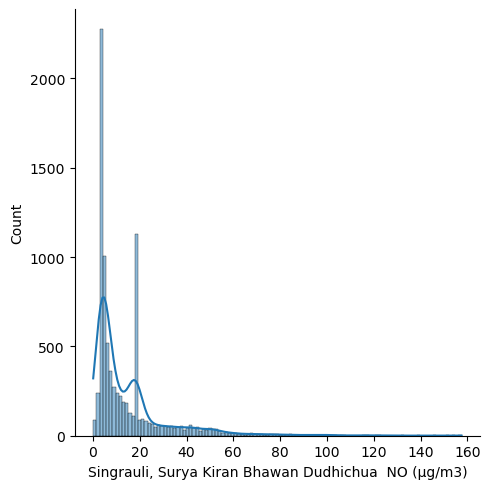

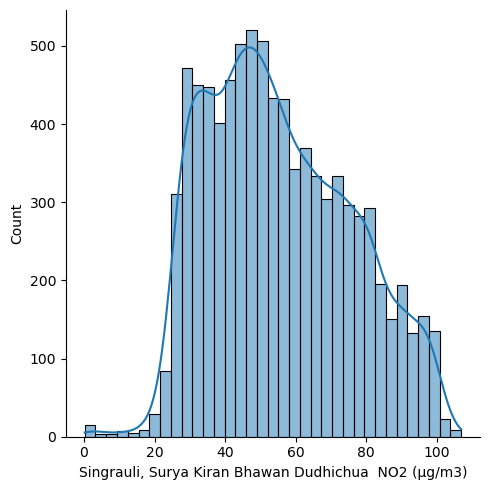

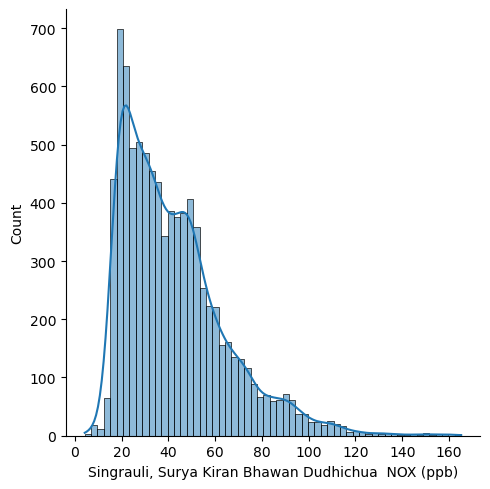

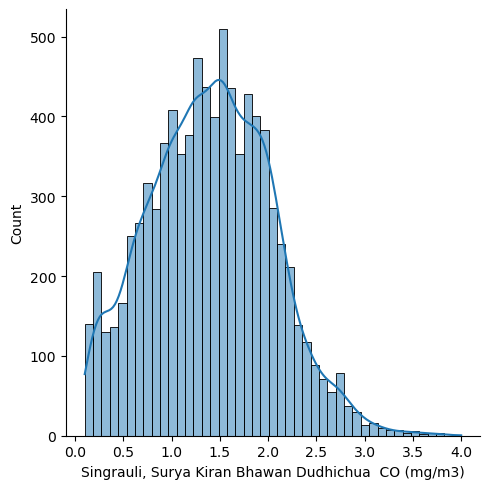

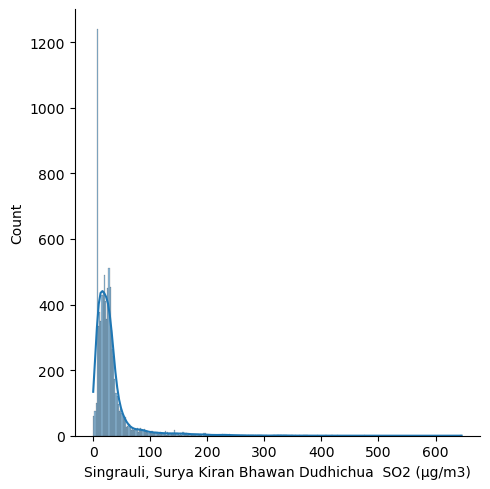

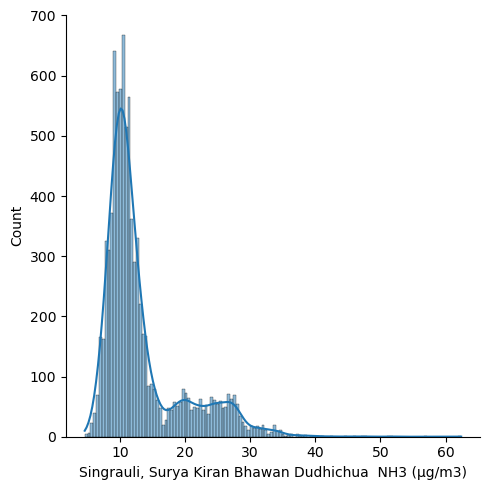

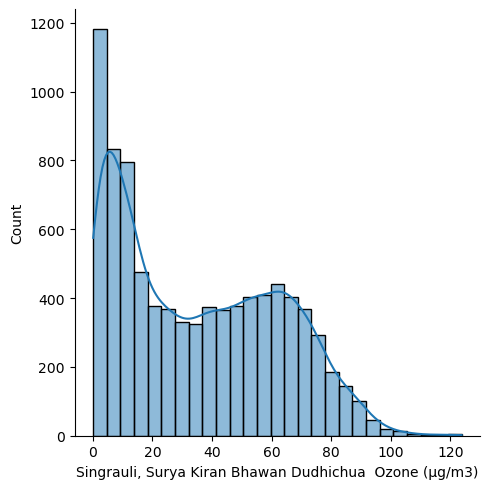

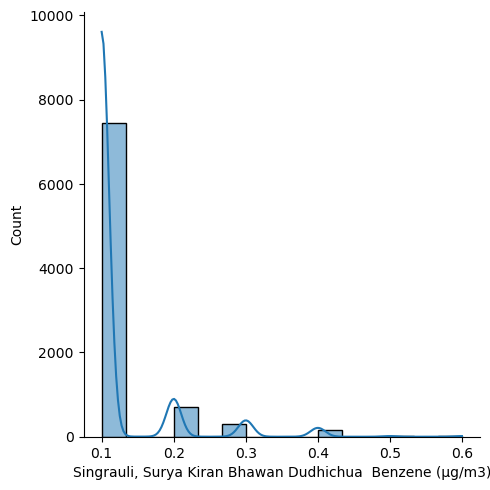

In [12]:
for column in columns:
    sns.displot(dataset[column], kde = True)
    plt.show()

In [13]:
dataset

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
0,1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,18.1,90.1,56.2,0.31,8.2,17.7,28.1,0.4
1,2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,18.1,88.0,55.1,0.33,8.2,18.3,27.1,0.4
2,3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,18.1,87.7,55.2,0.38,8.2,19.7,24.9,0.4
3,4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,18.1,88.9,55.7,0.38,8.2,21.3,21.9,0.4
4,5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,18.1,90.0,55.8,0.38,8.2,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8636,8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8637,8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1
8638,8639,01-05-2023 23:30,01-05-2023 23:45,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1


In [14]:
dataset.describe()

,#,"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
count,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,4320.500000,177.463079,75.557350,14.940208,55.430689,42.328802,1.401927,31.923270,13.286956,35.193970,0.122002
std,2494.297496,124.773568,54.826850,17.862679,20.205531,22.181225,0.633087,39.028371,6.171697,26.867859,0.063168
min,1.000000,12.000000,3.000000,0.100000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2160.750000,97.000000,36.821429,4.000000,39.300000,24.900000,0.950000,12.300000,9.500000,10.300000,0.100000
50%,4320.500000,151.900794,61.000000,7.500000,52.800000,37.500000,1.410000,22.800000,11.000000,31.700000,0.100000
75%,6480.250000,215.000000,101.000000,18.100000,70.700000,53.200000,1.850000,33.400000,14.000000,58.100000,0.100000
max,8640.000000,847.000000,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


### Import 'stats' libraries for modeling :

In [15]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg


## visualizes the average pollutant levels for each hour of a single day : 

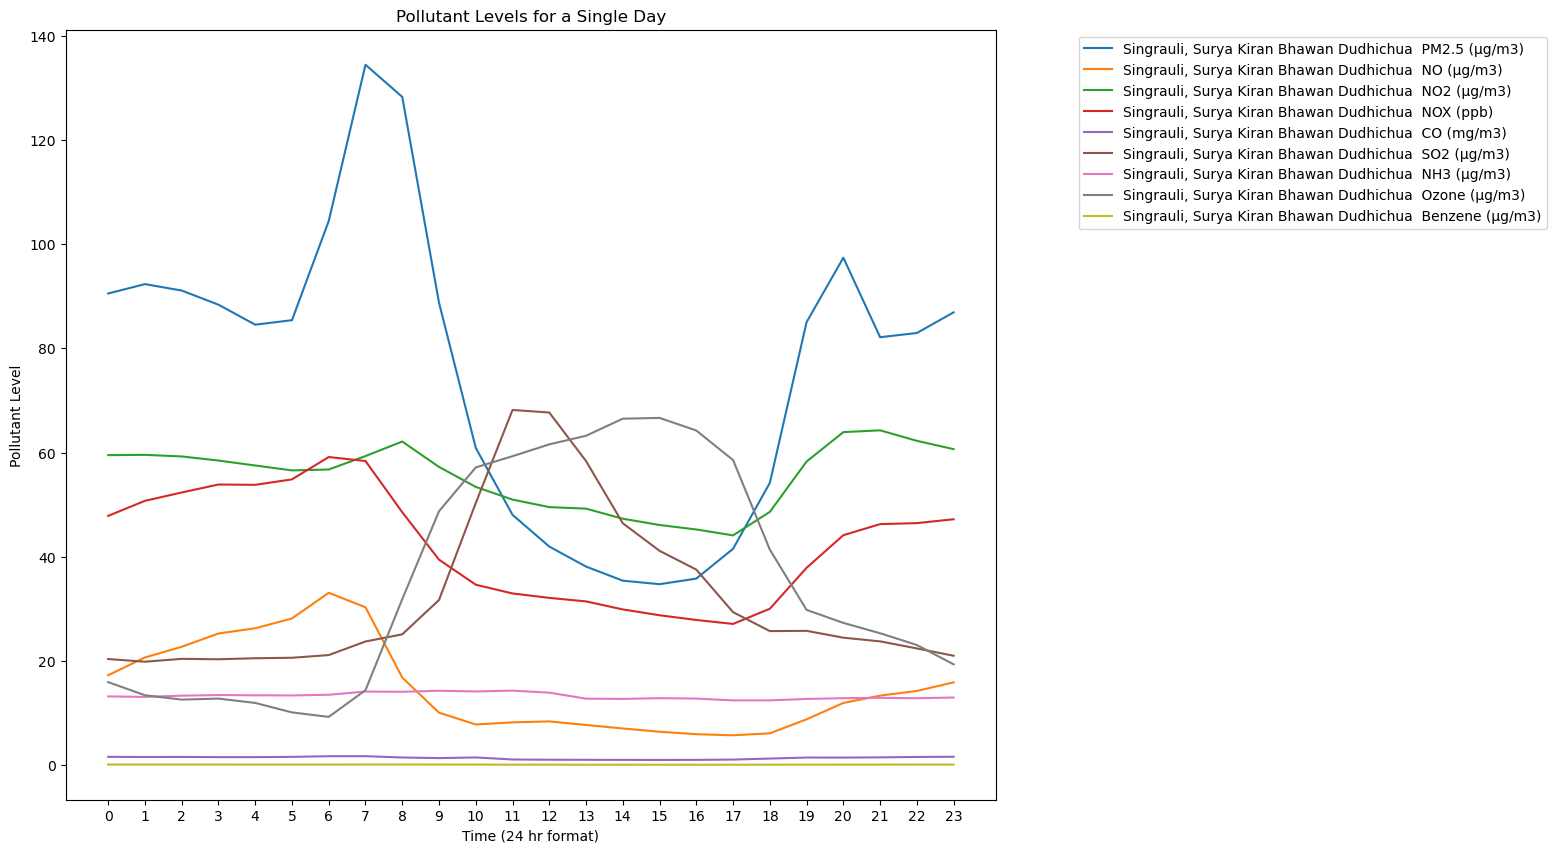

In [16]:
dataset['From'] = pd.to_datetime(dataset['From'])

dataset_hourly = dataset.groupby(dataset['From'].dt.hour).mean(numeric_only=True)

hours = range(24)
fig, axes = plt.subplots(figsize=(12, 10))

for col in dataset_hourly.columns[2:]:
    axes.plot(hours, dataset_hourly[col], label=col)

axes.set_xticks(hours)
axes.set_xticklabels(hours)

axes.set_xlabel('Time (24 hr format)')

axes.set_ylabel('Pollutant Level')

axes.set_title('Pollutant Levels for a Single Day')

axes.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()


### The graph represents the average pollution level for a single day, averaged over a 90-day period. The pollutants are plotted on the y-axis, while the x-axis represents time intervals in a 24-hour format (from 00:00 to 23:45).

### Multiple pollutants are shown in the graph, with each pollutant represented by a different line. The legend indicates the name of each pollutant.

### The graph provides insights into the variation of pollution levels throughout a day.

### The average pollution levels are calculated based on the data captured in 15-minute time intervals over a 90-day period.

### From the graph we can visualize the spikes of PM10 when the open-pit blasting takes place on average day (13:45 to 14:45)

## (Qn.2) How can you detect the blasting time from this timeseries?

### As we can observe from the above graph that spike of pollution level observed from 16:30pm onwards for most of the pollutants, from this data we can infer that blasting should be happened atleast 2-3 hours before the timing of increment in pollution level. Hence blasting time is 13:45pm to 14:45pm.

## (Qn.2) Checking whether data follows normal distribution?

### In the following code, the sm.qqplot() function is used to generate QQ plots for each column in the DataFrame. The line='s' argument specifies that a standardized line should be drawn on the plot, representing the theoretical quantiles of the standard normal distribution.

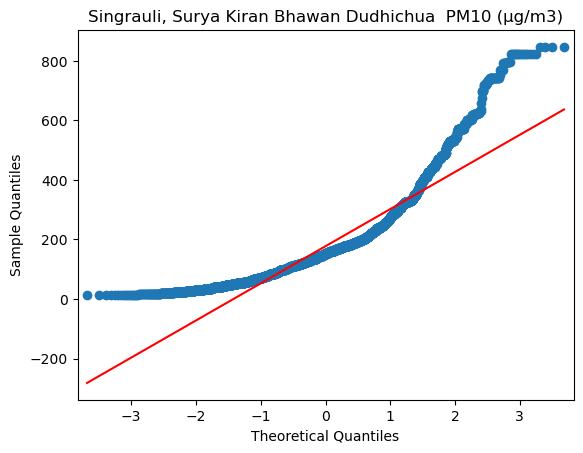

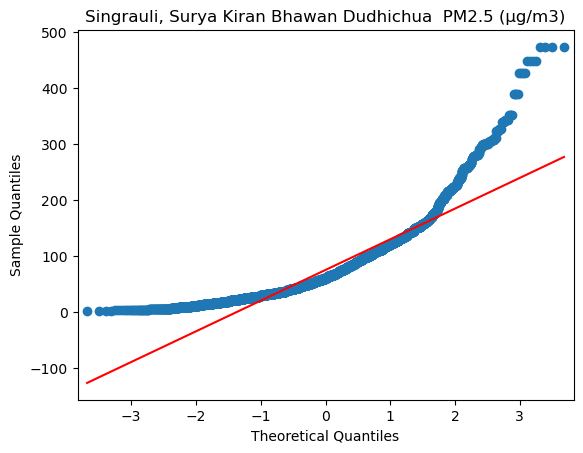

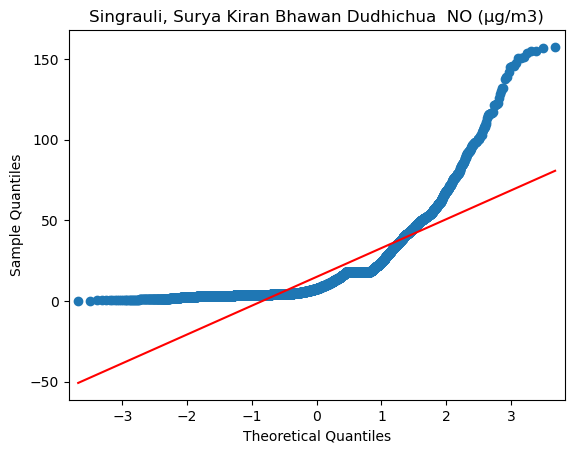

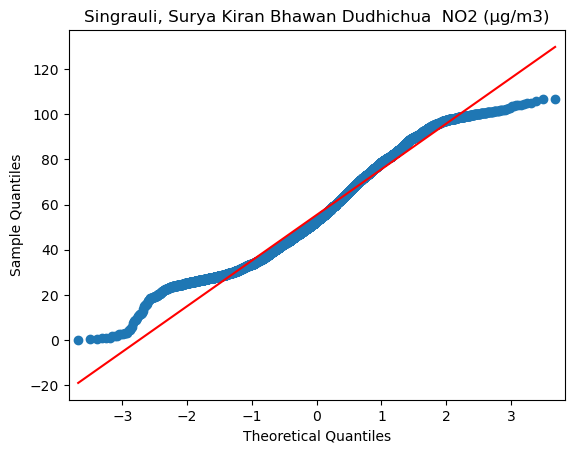

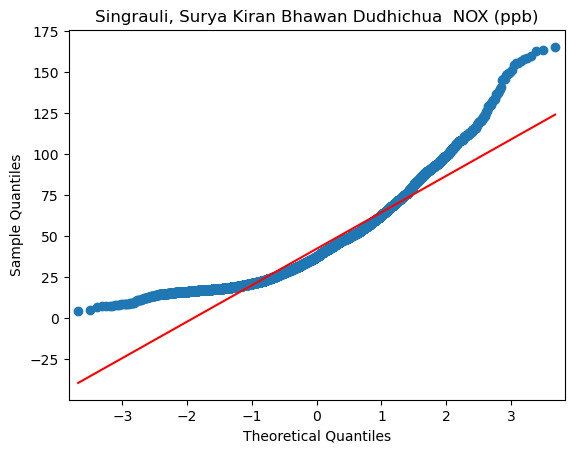

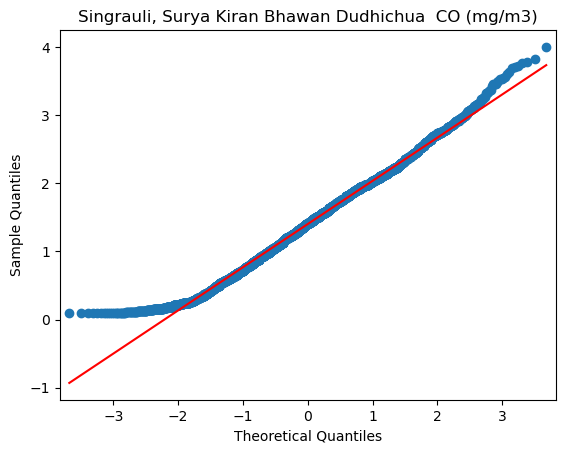

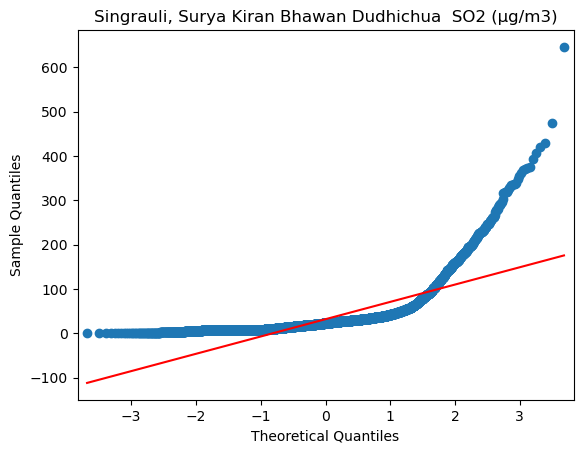

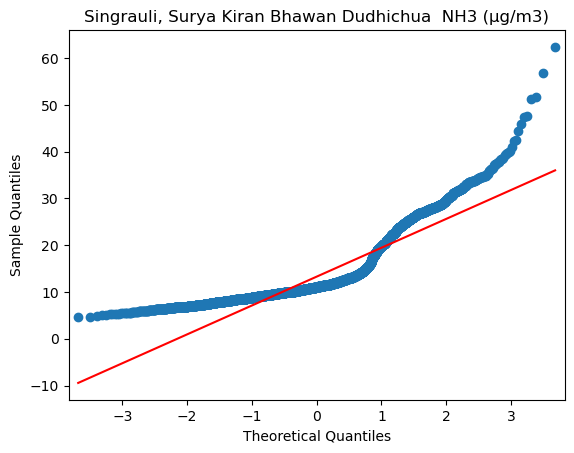

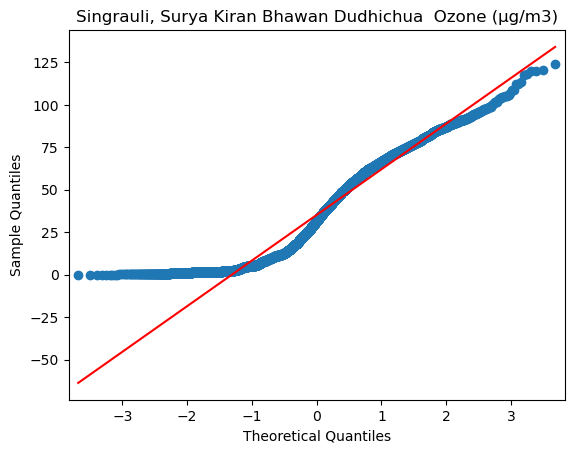

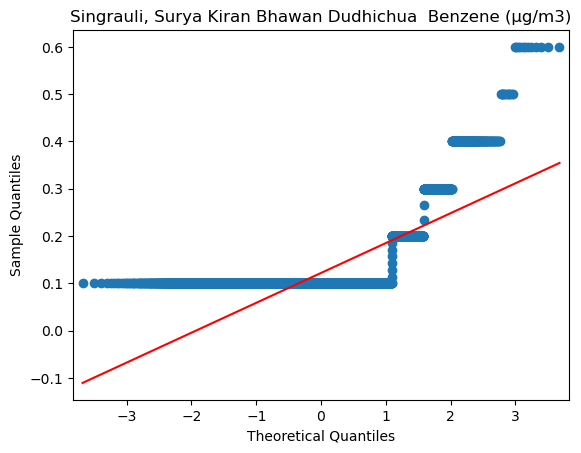

In [17]:
for column in columns:
    fig, ax = plt.subplots()
    sm.qqplot(dataset[column], line='s', ax=ax)  
    ax.set_title(column)
    plt.show()

### From the graph by comparing the data points to the standardized line, we can assess if the data in each column follows a standard normal distribution or deviates from it.

### If the data points closely follow the line, it suggests that the data in that column approximates a standard normal distribution. Conversely, if the data points significantly deviate from the line, it indicates departures from a standard normal distribution.

### From the above graphs we infer the following ->
### Distribution of NO2, CO and Ozone approximately follow normal distribution while others don't.

## (Qn.3.c) Checking Trend and Seasonality

<Figure size 2000x4000 with 0 Axes>

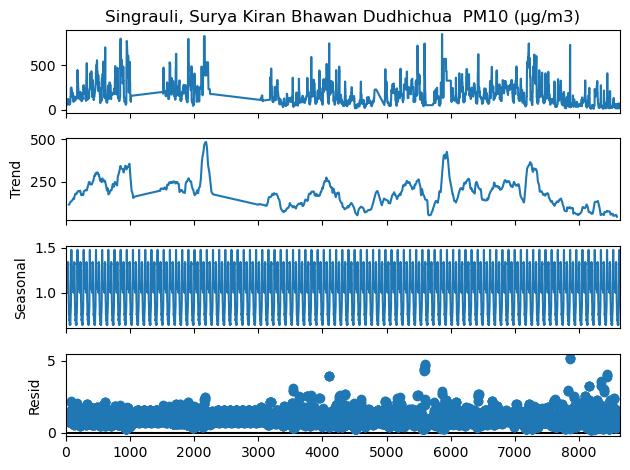

<Figure size 2000x4000 with 0 Axes>

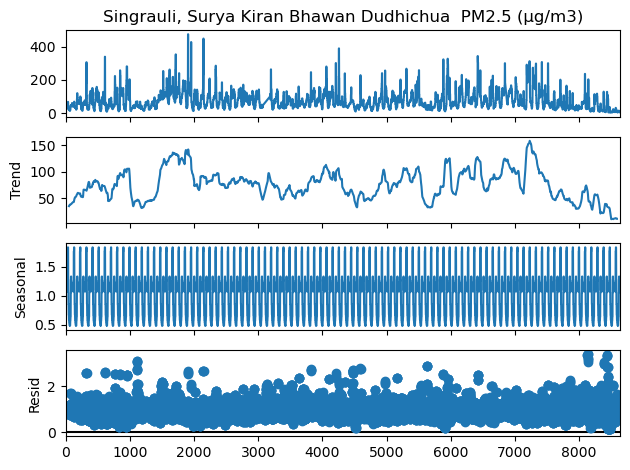

<Figure size 2000x4000 with 0 Axes>

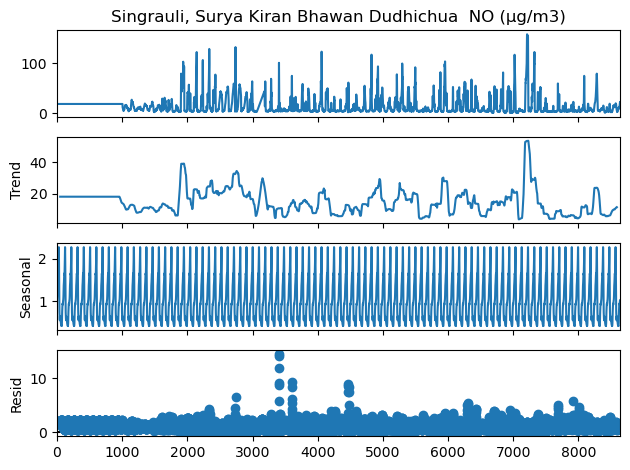

<Figure size 2000x4000 with 0 Axes>

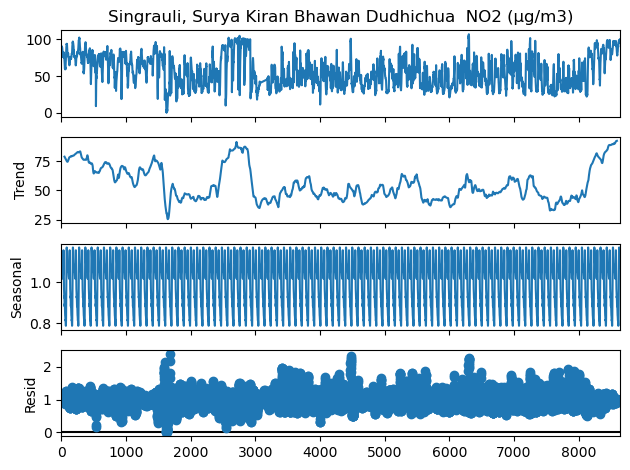

<Figure size 2000x4000 with 0 Axes>

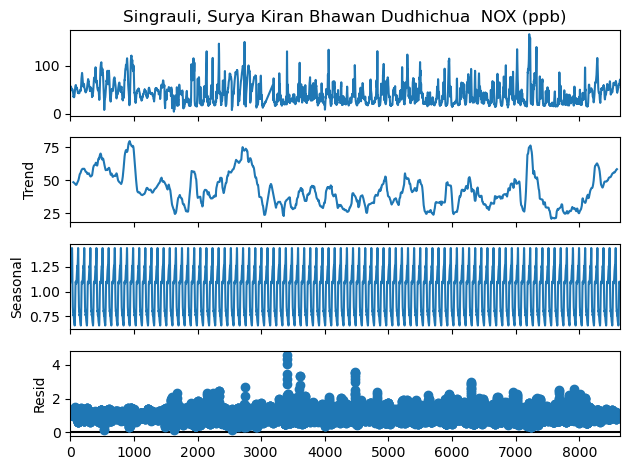

<Figure size 2000x4000 with 0 Axes>

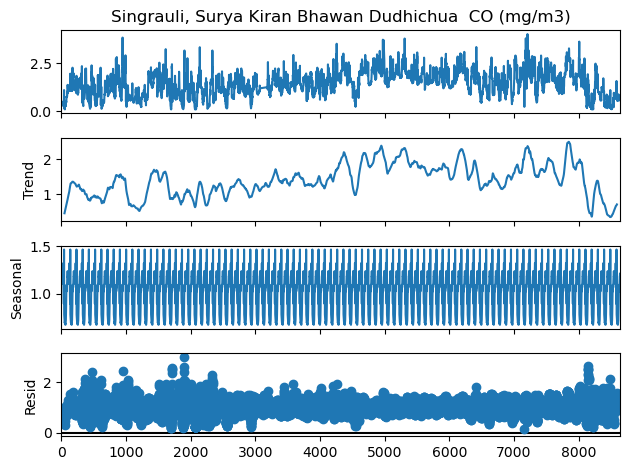

<Figure size 2000x4000 with 0 Axes>

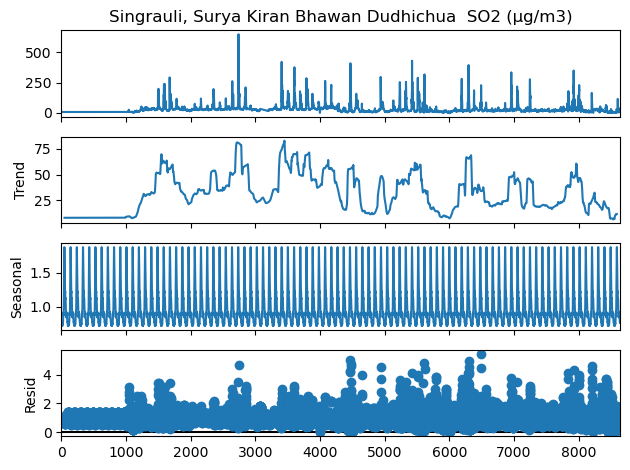

<Figure size 2000x4000 with 0 Axes>

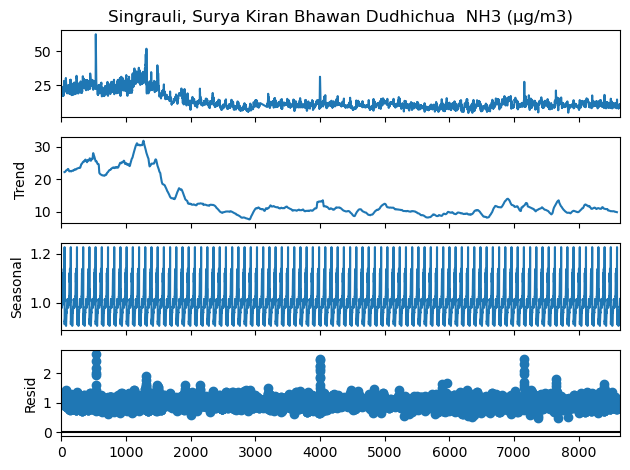

<Figure size 2000x4000 with 0 Axes>

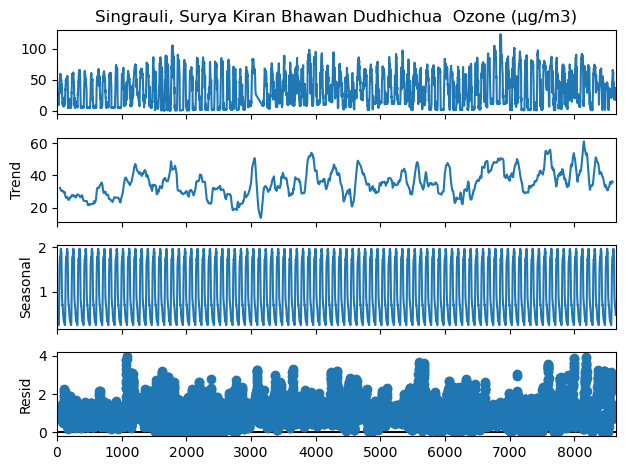

<Figure size 2000x4000 with 0 Axes>

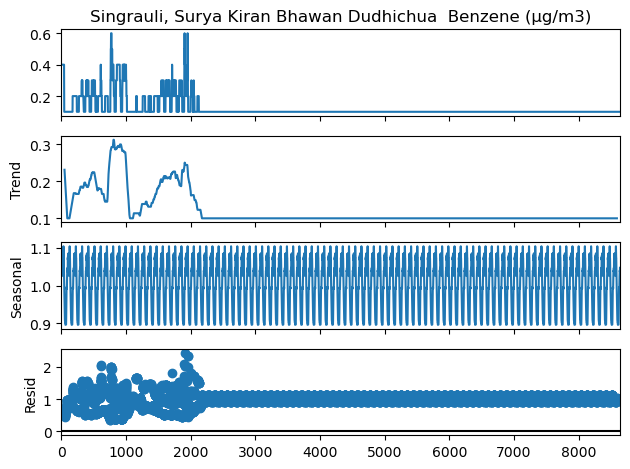

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
for column in columns:
    decompose_result_mult = seasonal_decompose(dataset[column], period = 96, model="multiplicative")
    plt.figure(figsize=(20, 40))
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    decompose_result_mult.plot()

### After decomposing the above time series data using the seasonal_decompose function from statsmodels, we can analyze the resulting plots to draw conclusions about seasonality and trend
### The trend component represents the long-term pattern or direction of the time series. It captures the overall upward or downward movement of the data over time. From the above time series data no trend is observed.
### The seasonal component represents the repetitive patterns or cycles that occur within the data. It captures regular fluctuations that repeat at fixed intervals. From the graph we observe the time interval of seasonal graph of every data is very small. Thus we observe no such seasonality in our time series data.

## ADFULLER TEST

### The adfuller function from the statsmodels.tsa.stattools module is used to perform the Augmented Dickey-Fuller (ADF) test on each column in the DataFrame. The ADF test is a statistical test used to determine if a time series is stationary or not. 

### The ADF test examines whether a time series is non-stationary. The null hypothesis of the ADF test is that the time series is non-stationary. The alternate hypothesis is that the time series is stationary

In [19]:
for column in columns:
    result = adfuller(dataset[column])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No. of Lags : %f' % result[2])
    print('No of Observation used for ADF regression and Critical Value Prediction : %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.023314
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8603.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -11.159054
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8603.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -14.799960
p-value: 0.000000
No. of Lags : 11.000000
No of Observation used for ADF regression and Critical Value Prediction : 8628.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -9.181725
p-value: 0.000000
No. of Lags : 21.000000
No of Observation used for ADF regression and Critical Value Prediction : 8618.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -12.734220
p-value: 0.000000
No. of Lags : 24.000000
No of Observation used for ADF regression and Critical Value Prediction : 8615.000000
Critical Values:

### From the above values we conclude the following ->

### The p-value is zero and the ADF statistic is more negative than the critical values at a chosen level of significance (e.g., 1%, 5%, or 10%), it suggests strong evidence to reject the null hypothesis of non-stationarity. In this case, we can conclude that the time series is stationary.

### Regarding trend and seasonality, here the time series is stationary, it implies that there is no significant trend or seasonality present in the data.

### Overall, a zero p-value and negative critical values in the ADF test suggest that there is no systematic trend or seasonality observed in the time series.

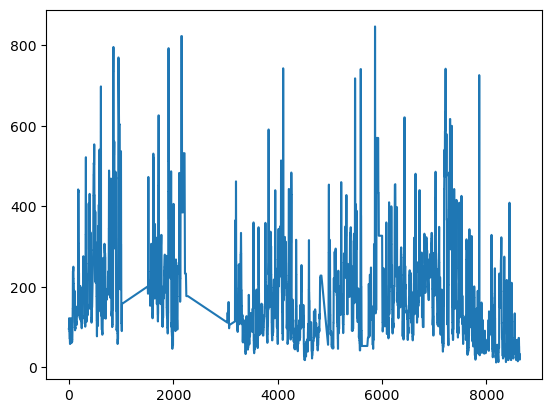

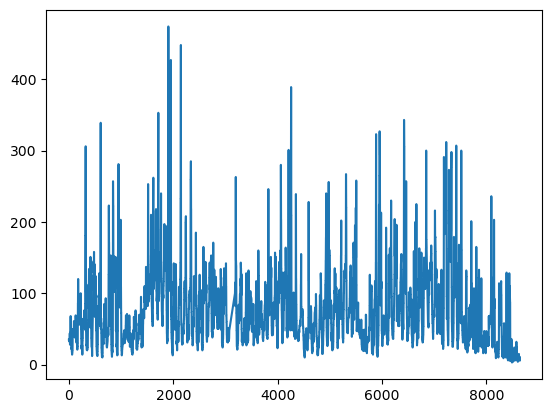

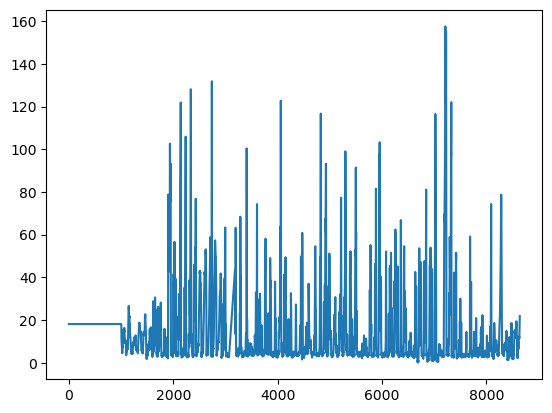

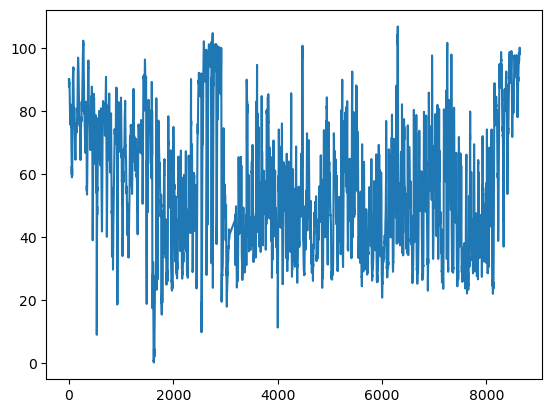

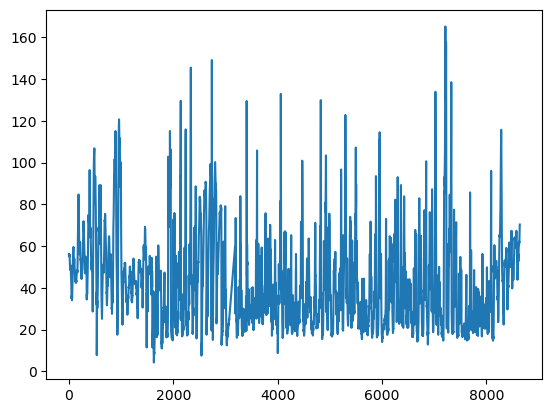

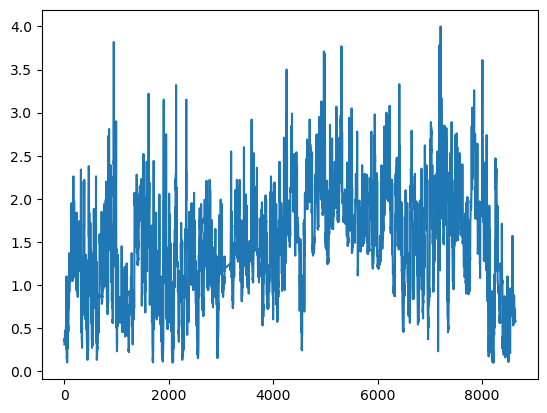

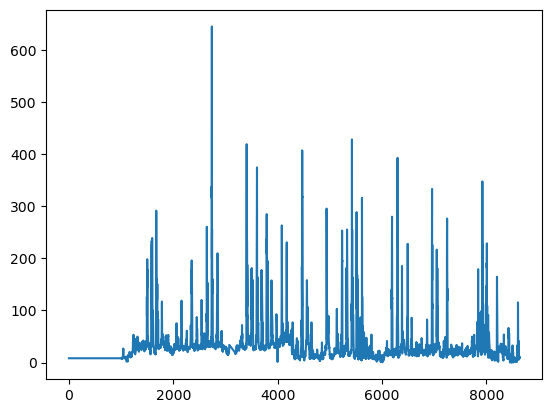

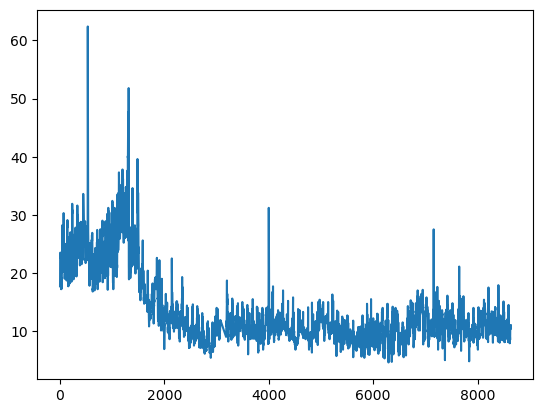

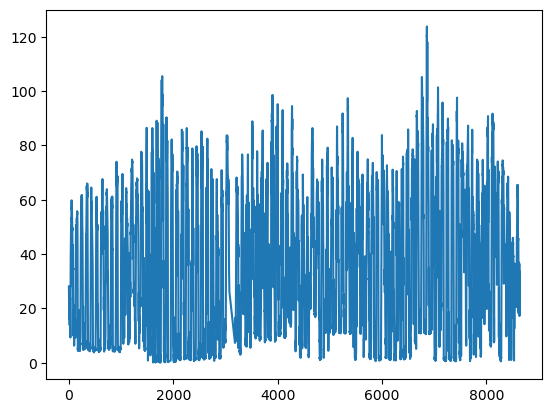

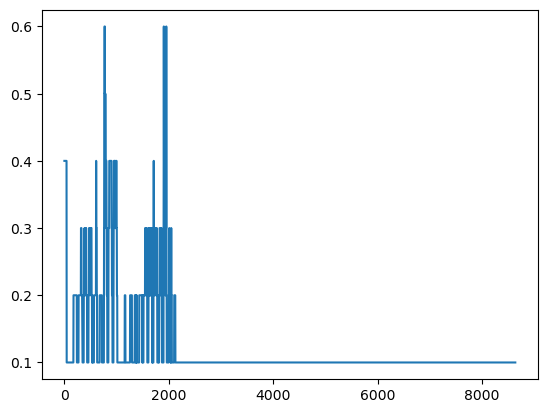

In [20]:
for column in columns:
    dataset[column].plot()
    plt.show()

### In the following code we are using statsmodels.graphics.tsaplots module to generate autocorrelation function (ACF) and partial autocorrelation function (PACF) plots. The ACF and PACF plots are commonly used in time series analysis to identify the presence of autocorrelation and determine the order of autoregressive (AR) and moving average (MA) components in a time series model.

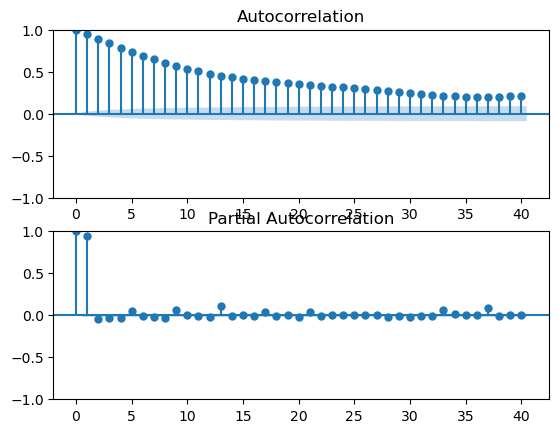

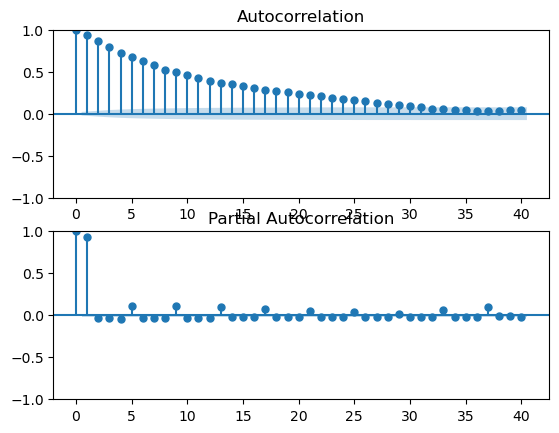

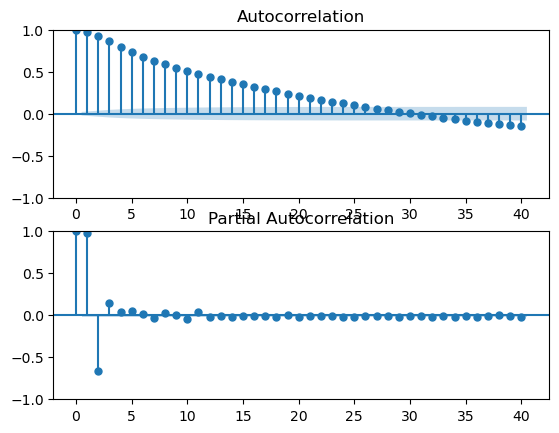

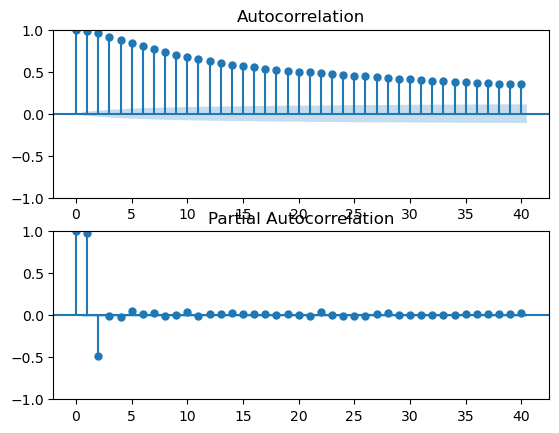

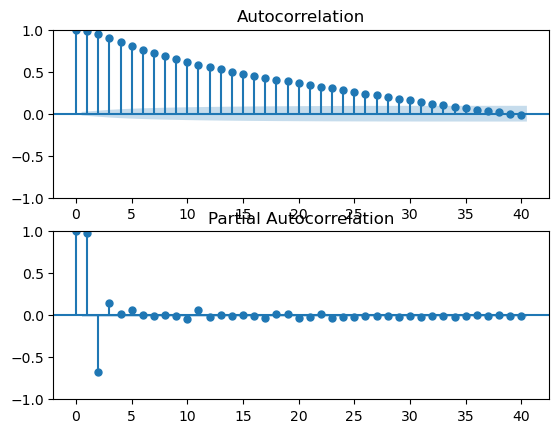

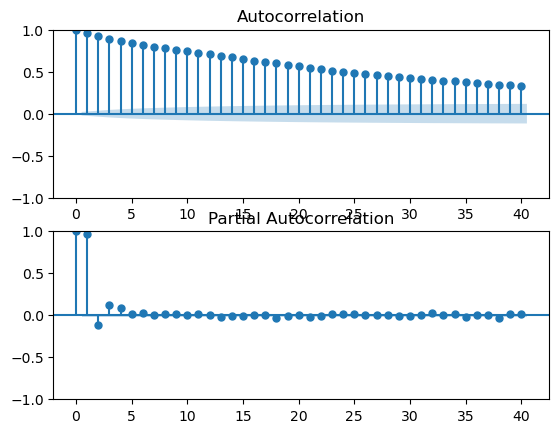

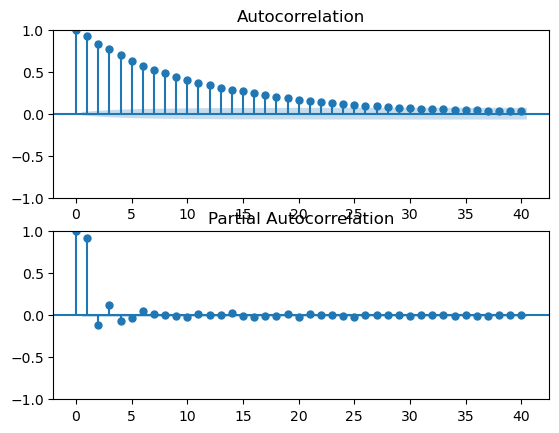

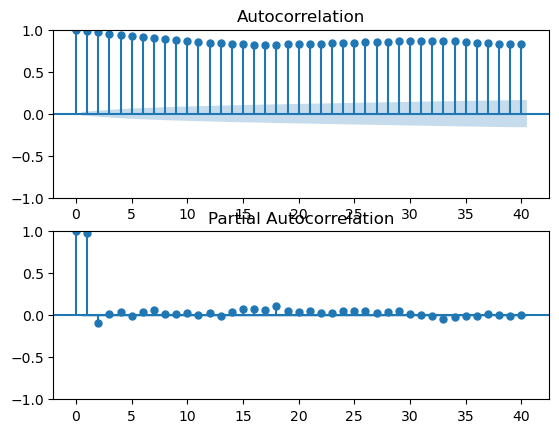

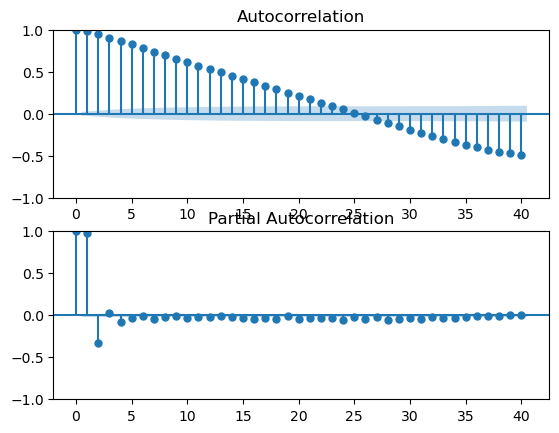

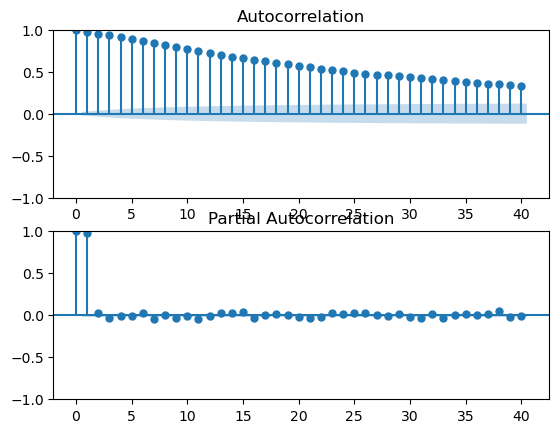

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
for column in columns:
    fig, (ax1, ax2) = plt.subplots(2)
    plot_acf(dataset[column], ax = ax1)
    plot_pacf(dataset[column], ax = ax2,method='ywm')
    plt.show()

## (Qn.3.f) From the above graph of ACF and PACF we observe that ->

### ACF: We observe a gradual decline in autocorrelation graph of the time series data.

### PACF: We observe significant spikes at lags and subsequent decay. If the PACF plot exhibits significant spikes at lags 'k' and subsequent decay, it suggests an AR component of order p = k.

### From above we infer that time series data follows Autoregressive (AR) model.

## Now that we have observed that the time series data follows AR model. We are using it to train and test our data->

### Here we are performing autoregressive modeling on each column in the DataFrame. Here we fit an autoregressive model to the data, generate predictions, and evaluate the model's performance using the RMSE. It also displays the model summary and plots the predicted values against the test data for visual inspection.

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8640
Model:                                                        AutoReg(3)   Log Likelihood              -44157.239
Method:                                                  Conditional MLE   S.D. of innovations             40.190
Date:                                                   Tue, 27 Jun 2023   AIC                          88324.479
Time:                                                           22:47:33   BIC                          88359.798
Sample:                                                                3   HQIC                         88336.522
                                                                    8640                                         
                                                               coef    std err          

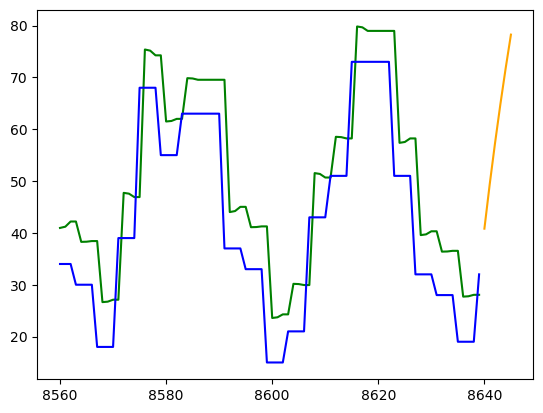

Mean : 177.463079
Root Mean Squared Error : 10.852239
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(3)   Log Likelihood              -38110.068
Method:                                                   Conditional MLE   S.D. of innovations             19.955
Date:                                                    Tue, 27 Jun 2023   AIC                          76230.136
Time:                                                            22:47:33   BIC                          76265.455
Sample:                                                                 3   HQIC                         76242.179
                                                                     8640                                         
                          

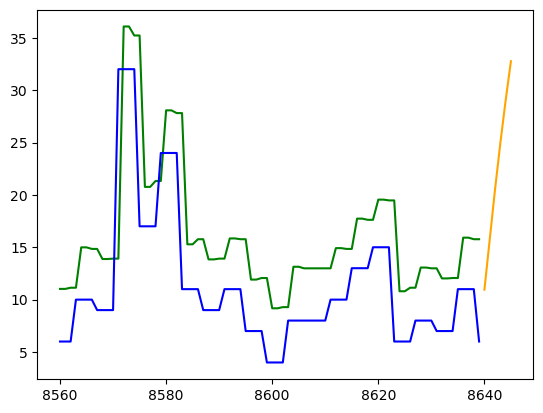

Mean : 75.557350
Root Mean Squared Error : 6.033443
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(3)   Log Likelihood              -21046.714
Method:                                                Conditional MLE   S.D. of innovations              2.767
Date:                                                 Tue, 27 Jun 2023   AIC                          42103.428
Time:                                                         22:47:33   BIC                          42138.747
Sample:                                                              3   HQIC                         42115.471
                                                                  8640                                         
                                                    

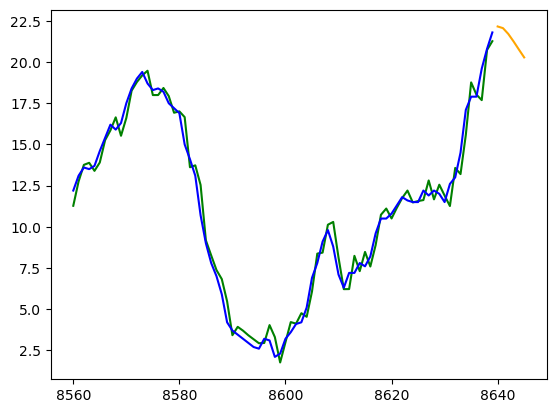

Mean : 14.940208
Root Mean Squared Error : 0.724277
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(3)   Log Likelihood              -21774.830
Method:                                                 Conditional MLE   S.D. of innovations              3.011
Date:                                                  Tue, 27 Jun 2023   AIC                          43559.661
Time:                                                          22:47:33   BIC                          43594.980
Sample:                                                               3   HQIC                         43571.704
                                                                   8640                                         
                                            

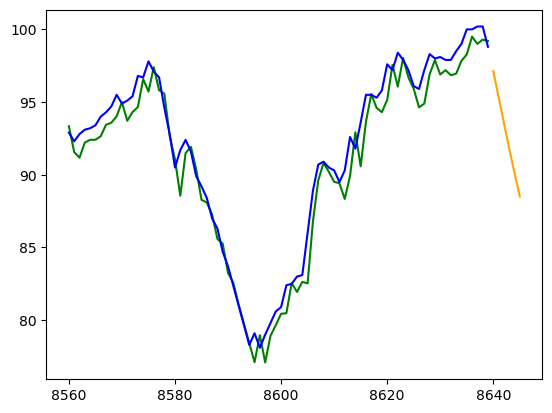

Mean : 55.430689
Root Mean Squared Error : 1.292297
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8640
Model:                                                     AutoReg(3)   Log Likelihood              -21068.541
Method:                                               Conditional MLE   S.D. of innovations              2.774
Date:                                                Tue, 27 Jun 2023   AIC                          42147.081
Time:                                                        22:47:33   BIC                          42182.400
Sample:                                                             3   HQIC                         42159.124
                                                                 8640                                         
                                                            

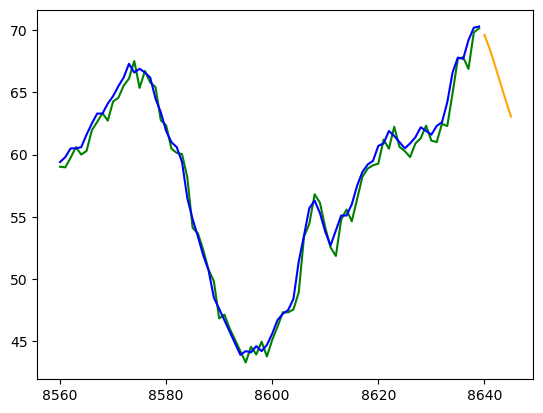

Mean : 42.328802
Root Mean Squared Error : 0.888006
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(3)   Log Likelihood                3269.221
Method:                                                Conditional MLE   S.D. of innovations              0.166
Date:                                                 Tue, 27 Jun 2023   AIC                          -6528.441
Time:                                                         22:47:34   BIC                          -6493.122
Sample:                                                              3   HQIC                         -6516.398
                                                                  8640                                         
                                                    

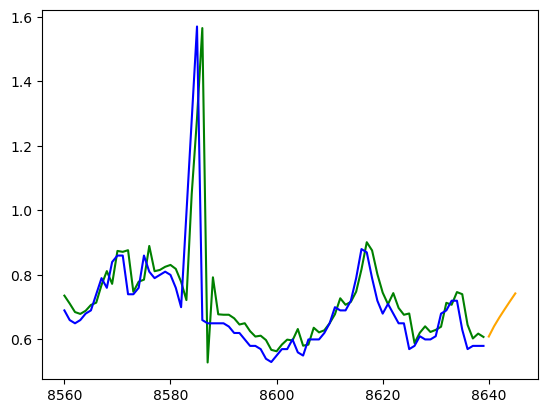

Mean : 1.401927
Root Mean Squared Error : 0.123370
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(3)   Log Likelihood              -35623.041
Method:                                                 Conditional MLE   S.D. of innovations             14.962
Date:                                                  Tue, 27 Jun 2023   AIC                          71256.081
Time:                                                          22:47:34   BIC                          71291.400
Sample:                                                               3   HQIC                         71268.124
                                                                   8640                                         
                                             

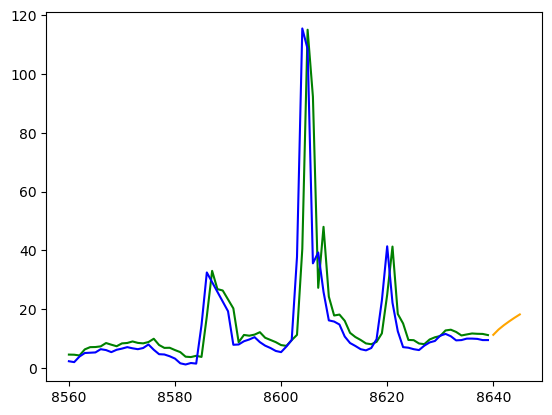

Mean : 31.923270
Root Mean Squared Error : 12.248406
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(3)   Log Likelihood              -12623.571
Method:                                                 Conditional MLE   S.D. of innovations              1.044
Date:                                                  Tue, 27 Jun 2023   AIC                          25257.142
Time:                                                          22:47:34   BIC                          25292.461
Sample:                                                               3   HQIC                         25269.185
                                                                   8640                                         
                                           

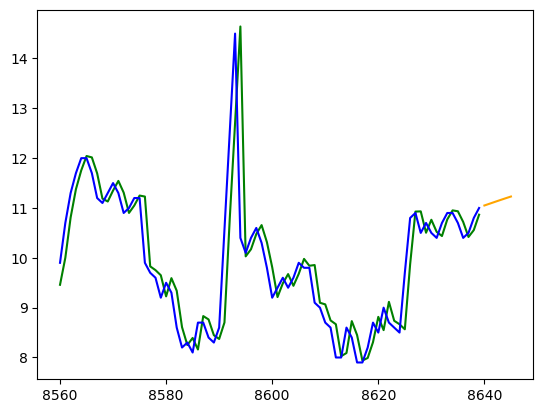

Mean : 13.286956
Root Mean Squared Error : 0.701728
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(3)   Log Likelihood              -26579.724
Method:                                                   Conditional MLE   S.D. of innovations              5.251
Date:                                                    Tue, 27 Jun 2023   AIC                          53169.447
Time:                                                            22:47:34   BIC                          53204.766
Sample:                                                                 3   HQIC                         53181.490
                                                                     8640                                         
                            

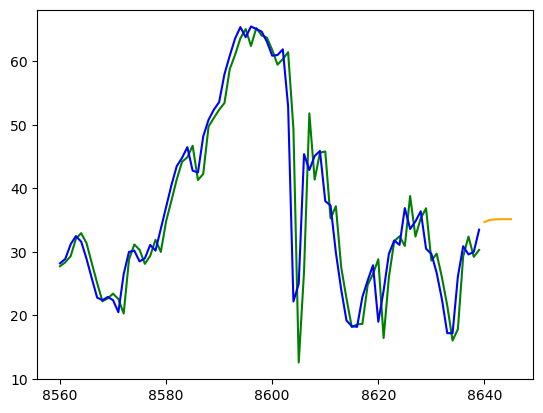

Mean : 35.193970
Root Mean Squared Error : 5.236985
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8640
Model:                                                           AutoReg(3)   Log Likelihood               25044.425
Method:                                                     Conditional MLE   S.D. of innovations              0.013
Date:                                                      Tue, 27 Jun 2023   AIC                         -50078.850
Time:                                                              22:47:34   BIC                         -50043.531
Sample:                                                                   3   HQIC                        -50066.807
                                                                       8640                                         
            

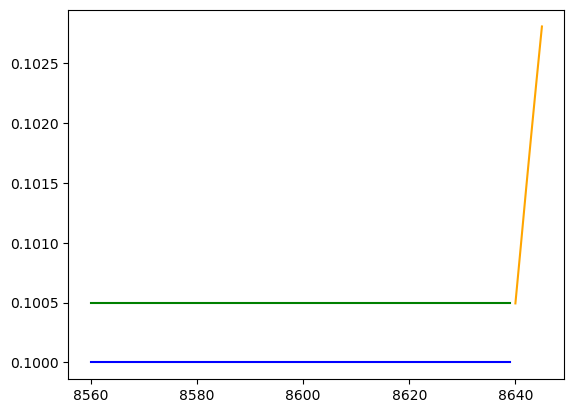

Mean : 0.122002
Root Mean Squared Error : 0.000493


In [22]:
for column in columns:
    X = dataset[column]
    X_train= X[:-80]
    X_test = X[-80:]
    ar_model = AutoReg(X, lags = 3).fit()
    print(ar_model.summary())
    predicted = ar_model.predict(start = len(X_train), end = len(X) - 1, dynamic=False)
    forecasting= ar_model.predict(start=len(X), end=len(X)+5,dynamic=False)
    plt.plot(predicted, color = "green")
    plt.plot(X_test, color = "blue")
    plt.plot(forecasting,color="orange")
    plt.show()
    rmse = sqrt(mean_squared_error(predicted, X_test))
    mean = X.mean()
    print("Mean : %f" % mean)
    print("Root Mean Squared Error : %f" %rmse)    

### From the above, we observe that using AR modelling, the curves for the time series data for NO,NO2,CO,NOX, Ozone are accurately fitted, while for PM10, PM2.5 curves are approximately fitted. Thus these curves can be used for future predictions. The RMSE value is also low here. This model is good for forecasting.

## (Qn.1) How NA values are interfering with plotting?

### 1. NA values results in gaps or breaks in the plotted line. This makes it difficult to visualize the complete time series and affects the interpretation of trends and patterns.

### 2. As we have multiple time series variables in different columns, NA values in one column causes misalignment with the time points in other columns. This distorts the visual representation of the relationships between different time series variables.

## (Qn.1) Can we just replace NA with 0 values? 
## What is better strategy? 

### Replacing NA with 0 value creates breaks in the plot makes it difficult to visualize the complete time series. Even we cann't replace NA with mean of the data as well after watching the plots of code number 9 and missing percentage from code 10, Since more than half of the distribution of columns have skewed distribution, using the mean to fill NA values is not good. That's why we are filling NA values using cubic interpolatation. This ensures that the summary statistics, such as the mean and standard deviation, are less affected compared to filling with other values like zero or the mean. This helps to maintain the integrity of the statistical measures.

## (Qn.3) Problem Statements :

### In this problem,  we are analyzing the impact of blasting activities on air pollution in Coal India. The time series data consists of air pollution measurements taken during the time of blasting events. We had explored the data using a combination of the following statistical inference techniques :

### (a) Classification: Dataset follows Flow time series for the period of 3 months (1st feb - 1st may).

### (b) Curve fitting: I have polled the curve for air pollution level with respect to time refer code number 16 in which I diveided the x-axis in to 24 parts representing one single day.

### (c) Descriptive analysis: After decomposing the above time series data using the seasonal_decompose function from statsmodels, we can analyze the resulting plots to draw conclusions about seasonality and trend
### The trend component represents the long-term pattern or direction of the time series. It captures the overall upward or downward movement of the data over time. From the above time series data no trend is observed.
### The seasonal component represents the repetitive patterns or cycles that occur within the data. It captures regular fluctuations that repeat at fixed intervals. From the graph we observe the time interval of seasonal graph of every data is very small. Thus we observe no such seasonality in our time series data. In code number 14 measures of frequency, central tendency, dispersion or variation, and position of air pollution data are mentioned.

### (d) Explanatory analysis: The available air pollution measurements via the multi-sensory system include PM10, PM2.5, SO2, NO2, NOx, CO, NH3, O3, and BENZENE.

### Here are some of the key causes and effects of air pollution in Singrauli: 
### 1. The release of particulate matter, sulfur dioxide (SO2), nitrogen oxides (NOx), and other pollutants during coal mining and burning processes leads to poor air quality.
### 2. Singrauli houses several thermal power plants that rely on coal as the primary fuel. These power plants emit a substantial amount of pollutants, including particulate matter, sulfur dioxide, nitrogen oxides, and carbon dioxide (CO2), which contribute to air pollution in the region.
### 3. Singrauli has various heavy industries such as aluminum smelters, cement plants, and chemical factories. These industries release pollutants into the air during their operations, including harmful gases, particulate matter, and volatile organic compounds (VOCs), contributing to air pollution.
### 4. Dust from construction sites, open areas, and unpaved roads is a significant contributor to air pollution in Singrauli. Construction activities without proper dust control measures can release particulate matter into the air, causing respiratory problems and reducing air quality.

### The effects of air pollution in Singrauli are wide-ranging and can have severe consequences for human health and the environment. These effects include:
### 1. Prolonged exposure to polluted air can lead to respiratory problems such as asthma, bronchitis, and other respiratory tract infections. 
### 2. Air pollution in Singrauli not only affects human health but also has detrimental effects on the environment. It contributes to the acidification of water bodies, soil degradation, and damage to vegetation and ecosystems.
### 3. The release of greenhouse gases, particularly carbon dioxide from coal combustion, contributes to climate change. It exacerbates global warming and the associated impacts such as heatwaves, altered precipitation patterns, and other climate-related events.

### (f) Forecasting: From the above graph of ACF and PACF we observe that ->
### ACF: We observe a gradual decline in autocorrelation graph of the time series data.
### PACF: We observe significant spikes at lags and subsequent decay. If the PACF plot exhibits significant spikes at lags 'k' and subsequent decay, it suggests an AR component of order p = k.
### From above we infer that time series data follows Autoregressive (AR) model.
### Now that we have observed that the time series data follows AR model.

